In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# Shape of each dataset after some filtering:
print(reviews.shape)
print(ratings.shape)
print(sales.shape)

(28470, 10)
(2393, 34)
(19689, 6)


In [100]:
# Reviews Dataset

# Notes:
# The original price / discount price has a lot of missing and erroneous values, so we shouldn't use it
# I used regex to split up the recent and all review columns into 3 new columns each
# I made frequency plots for both popular tags and achievements

rw = pd.read_csv('data/reviews.csv')
reviews = rw.loc[:, ['name', 'recent_reviews', 'all_reviews', 
#                      'release_date', 'developer', 'publisher', 'genre', 'languages'
                     'popular_tags', 'achievements',
#                      'original_price', 'discount_price'
                    ]]
# reviews.dropna(subset=['recent_reviews', 'all_reviews'], inplace=True) #this takes it from 40833 rows to 2700
# reviews.dropna(subset=['recent_reviews'], inplace=True) #this takes it from 40833 rows to 2706
reviews.dropna(subset=['all_reviews'], inplace=True) #this takes it from 40833 rows to 28470


# use regex to separate out the numbers in recent and all reviews
pattern = r'([a-zA-Z\s]+),\(([\d,]+)\),-\s(\d+)%' #will handle if the number has a comma

# create the 3 new columns for recent and all reviews
reviews[['recent_sentiment', 'recent_review_number', 'recent_positive_percentage']] = reviews['recent_reviews'].str.extract(pattern)
reviews[['all_sentiment', 'all_review_number', 'all_positive_percentage']] = reviews['all_reviews'].str.extract(pattern)

reviews['recent_review_number'] = reviews['recent_review_number'].str.replace(',', '')
reviews['recent_review_number'] = pd.to_numeric(reviews['recent_review_number'])
reviews['recent_positive_percentage'] = pd.to_numeric(reviews['recent_positive_percentage'])

reviews['all_review_number'] = reviews['all_review_number'].str.replace(',', '')
reviews['all_review_number'] = pd.to_numeric(reviews['all_review_number'])
reviews['all_positive_percentage'] = pd.to_numeric(reviews['all_positive_percentage'])
reviews.drop(columns=['recent_reviews', 'all_reviews'], inplace=True)

# String off the $ from the prices
# reviews['original_price'] = reviews['original_price'].str.replace('$', '')
# reviews['discount_price'] = reviews['discount_price'].str.replace('$', '')

reviews.reset_index(inplace=True)
reviews.head()
# reviews.count()

# reviews
# reviews.dtypes
reviews.describe()

,index,achievements,recent_review_number,recent_positive_percentage,all_review_number,all_positive_percentage
count,28470.000000,11717.000000,2700.000000,2700.000000,1.734800e+04,17348.000000
mean,15964.156445,79.444909,116.115185,77.340741,1.520218e+03,74.704519
std,9157.139974,457.364437,775.444557,17.145094,2.723234e+04,18.580072
min,0.000000,1.000000,10.000000,0.000000,1.000000e+01,0.000000
25%,8371.250000,12.000000,15.000000,68.000000,2.300000e+01,64.000000
50%,15942.500000,21.000000,28.000000,81.000000,6.300000e+01,79.000000
75%,23831.750000,38.000000,66.000000,90.000000,2.970000e+02,89.000000
max,40811.000000,9821.000000,36076.000000,100.000000,3.094223e+06,100.000000


/var/folders/xb/kh9kw84n5k57h6w4jp5kr23m0000gn/T/ipykernel_48037/3330313195.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Tag', data=tag_counts.head(30), palette='viridis')


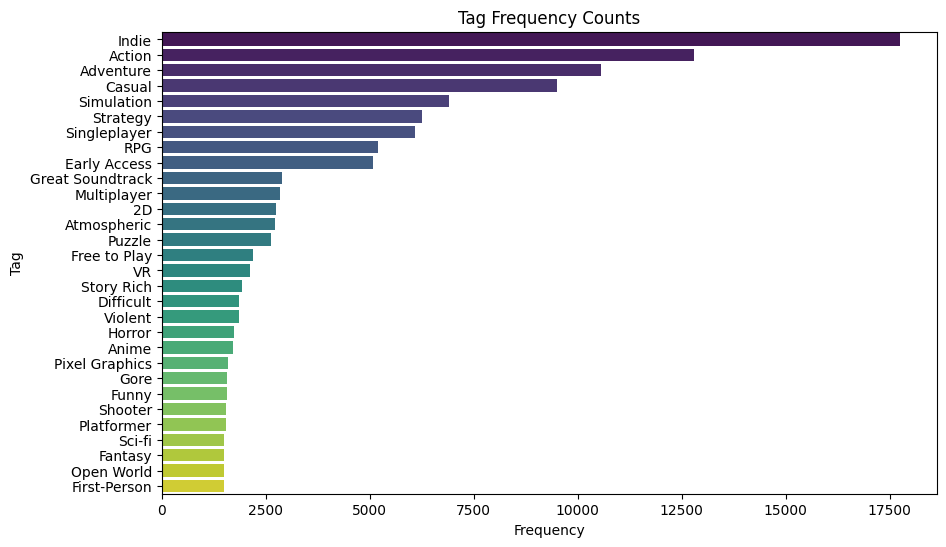

In [90]:
# Creates a plot for frequency counts of Tags (30 most frequent)

all_tags = [tag for tags in reviews['popular_tags'].str.split(',') if isinstance(tags, list) for tag in tags]

# Create a DataFrame with tag frequencies
tag_counts = pd.Series(all_tags).value_counts().reset_index()
tag_counts.columns = ['Tag', 'Frequency']

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Tag', data=tag_counts.head(30), palette='viridis')
plt.title('Tag Frequency Counts')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()

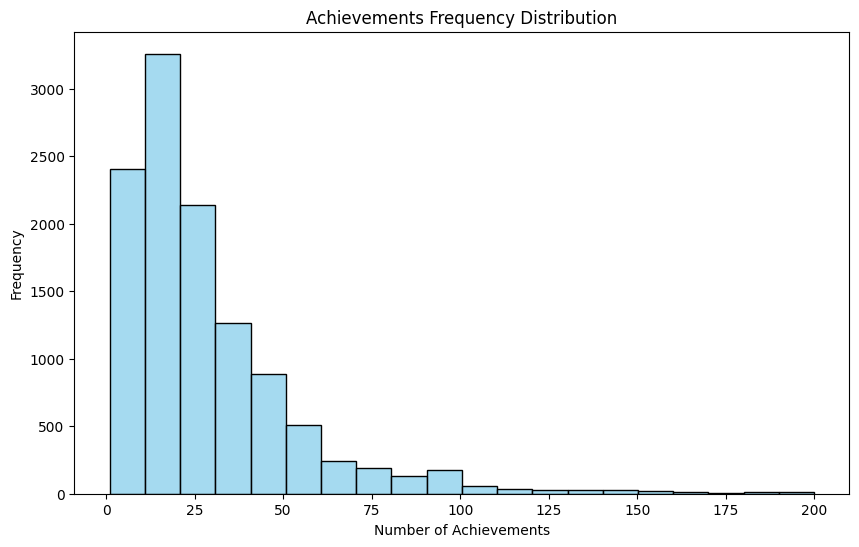

In [99]:
# Create a plot for Achievements Frequency (some values up in the 1000s that I filtered out)

filtered_df = reviews[reviews['achievements'] <= 200]


plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['achievements'].dropna(), bins=20, kde=False, color='skyblue')
plt.title('Achievements Frequency Distribution')
plt.xlabel('Number of Achievements')
plt.ylabel('Frequency')
plt.show()

In [97]:
reviews['achievements'].describe()

count    11717.000000
mean        79.444909
std        457.364437
min          1.000000
25%         12.000000
50%         21.000000
75%         38.000000
max       9821.000000
Name: achievements, dtype: float64

In [5]:
ratings = pd.read_csv('data/ratings.csv')
ratings

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,For Honor,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
2389,Victor Vran Overkill Edition,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
2390,Danganronpa 1•2 Reload,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,M
2391,Touhou Double Focus,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


/var/folders/xb/kh9kw84n5k57h6w4jp5kr23m0000gn/T/ipykernel_48037/1371077087.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='esrb_rating', data=ratings, palette='cividis')


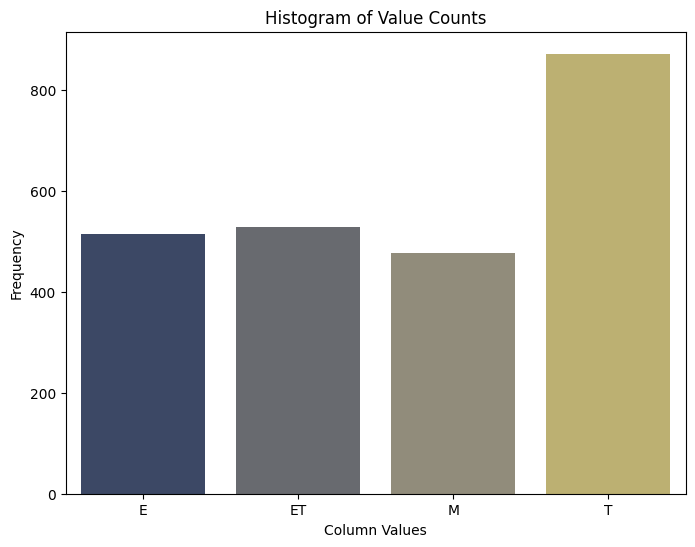

In [154]:
ratings['esrb_rating'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='esrb_rating', data=ratings, palette='cividis')
plt.title('Histogram of Value Counts')
plt.xlabel('Column Values')
plt.ylabel('Frequency')
plt.show()

/var/folders/xb/kh9kw84n5k57h6w4jp5kr23m0000gn/T/ipykernel_48037/807980639.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first.index, y=first.values, palette='viridis')


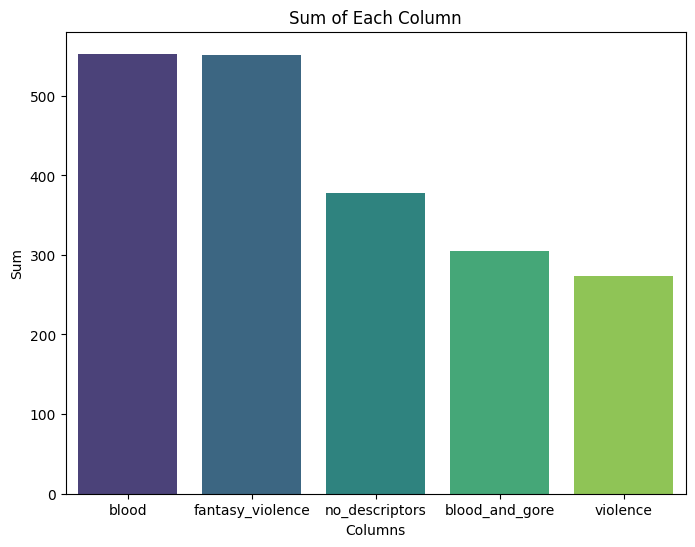

In [139]:
# Plot of the most frequent warning tags
column_sums = ratings.drop(['title', 'esrb_rating', 'console'], axis=1).sum()
sorted_columns = column_sums.sort_values(ascending=False)

first = sorted_columns.head(5)

# Create a Seaborn bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=first.index, y=first.values, palette='viridis')
plt.title('Sum of Each Column')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.show()

In [126]:
# Frequency count of warning tags
sorted_columns

blood                       553
fantasy_violence            551
no_descriptors              378
blood_and_gore              305
violence                    274
language                    270
intense_violence            262
suggestive_themes           261
strong_janguage             250
mild_lyrics                 178
mild_blood                  172
simulated_gambling          138
crude_humor                 123
alcohol_reference           121
mild_fantasy_violence       120
sexual_themes               114
mild_suggestive_themes      104
mild_violence               104
strong_sexual_content        93
lyrics                       83
drug_reference               82
sexual_content               75
use_of_alcohol               73
mild_language                68
use_of_drugs_and_alcohol     55
partial_nudity               54
mild_cartoon_violence        51
cartoon_violence             48
nudity                       39
mature_humor                 22
animated_blood               20
dtype: i

In [143]:
# Sales Datasets:

sales2016 = pd.read_csv('data/sales2016.csv')
sales2017 = pd.read_csv('data/sales2017.csv')
s16 = sales2016.loc[:, ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales']]
s17 = sales2017.loc[:, ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales']]

sales = pd.merge(s16, s17, on=['Name', 'Platform', 'Year_of_Release', 'Genre',], how='outer', suffixes=('_2016', '_2017'))
sales['Global_Sales_2016'].fillna(0, inplace=True)
sales['Global_Sales_2017'].fillna(0, inplace=True)
sales['Global_Sales'] = sales[['Global_Sales_2016', 'Global_Sales_2017']].max(axis=1)
sales.drop(['Global_Sales_2016', 'Global_Sales_2017'], axis=1, inplace=True)
sales['Global_Sales'].replace(0, np.nan, inplace=True)
sales['Year_of_Release'] = sales['Year_of_Release'].fillna(0).astype(int)
sales

,Name,Platform,Year_of_Release,Genre,Global_Sales
0,Wii Sports,Wii,2006,Sports,82.54
1,Super Mario Bros.,NES,1985,Platform,40.24
2,Mario Kart Wii,Wii,2008,Racing,35.57
3,Wii Sports Resort,Wii,2009,Sports,32.78
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,31.37
...,...,...,...,...,...
19684,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007,Adventure,0.01
19685,Fashion Designer: Style Icon,DS,2007,Simulation,0.01
19686,Ashita no Joe 2: The Anime Super Remix,PS2,2002,Fighting,0.01
19687,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009,Adventure,0.01


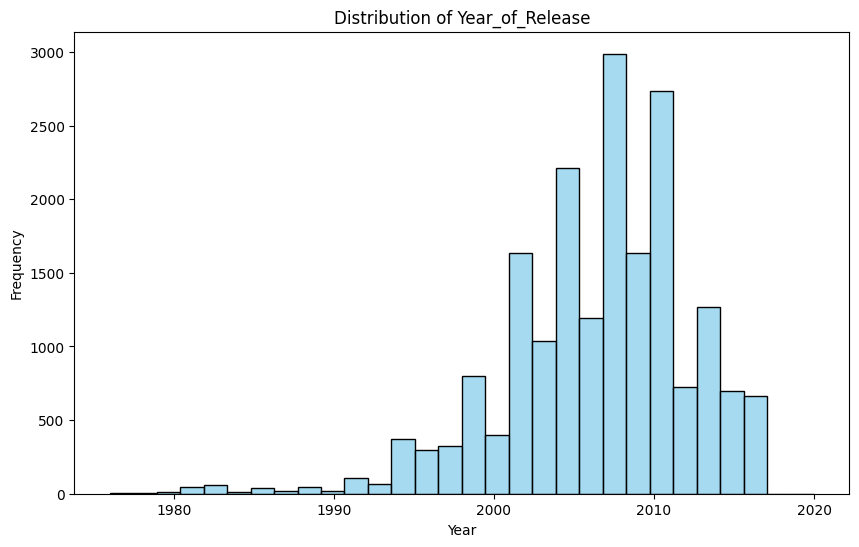

In [146]:
# Histogram for Year
filtered_sales = sales[sales['Year_of_Release'] != 0]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_sales['Year_of_Release'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Year_of_Release')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

/var/folders/xb/kh9kw84n5k57h6w4jp5kr23m0000gn/T/ipykernel_48037/964923758.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year_of_Release', data=filtered_sales, palette='plasma')


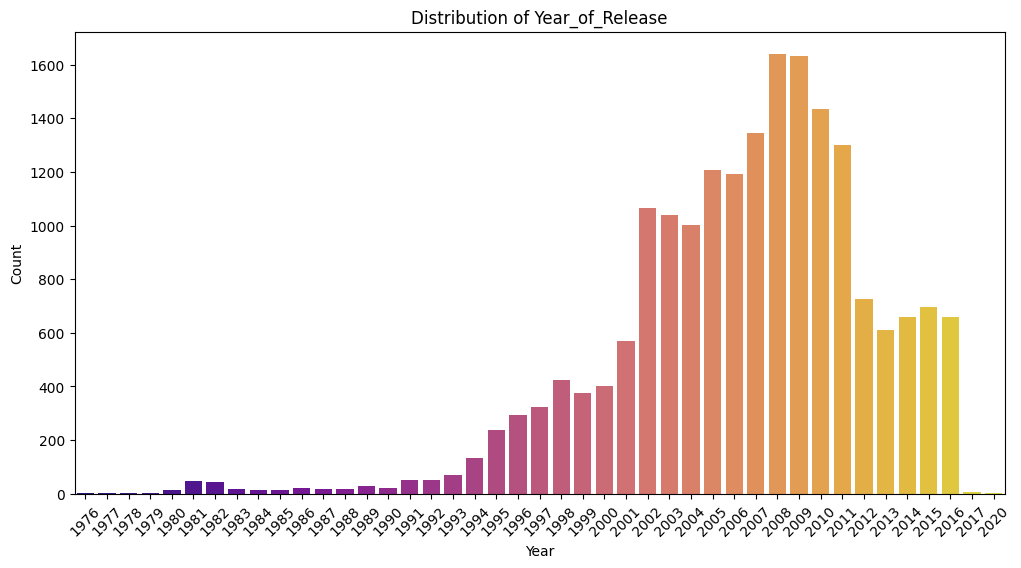

In [153]:
# Countplot for Year

plt.figure(figsize=(12, 6))
sns.countplot(x='Year_of_Release', data=filtered_sales, palette='plasma')
plt.title('Distribution of Year_of_Release')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/xb/kh9kw84n5k57h6w4jp5kr23m0000gn/T/ipykernel_48037/421976036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=sales, palette='deep')


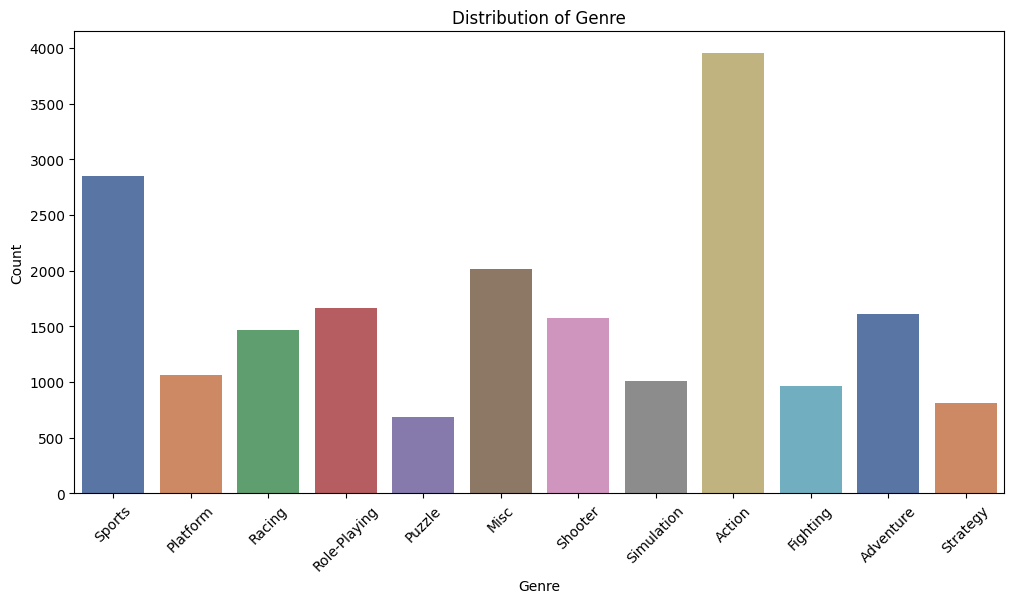

In [151]:
# Genre Countplot

plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=sales, palette='deep')
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

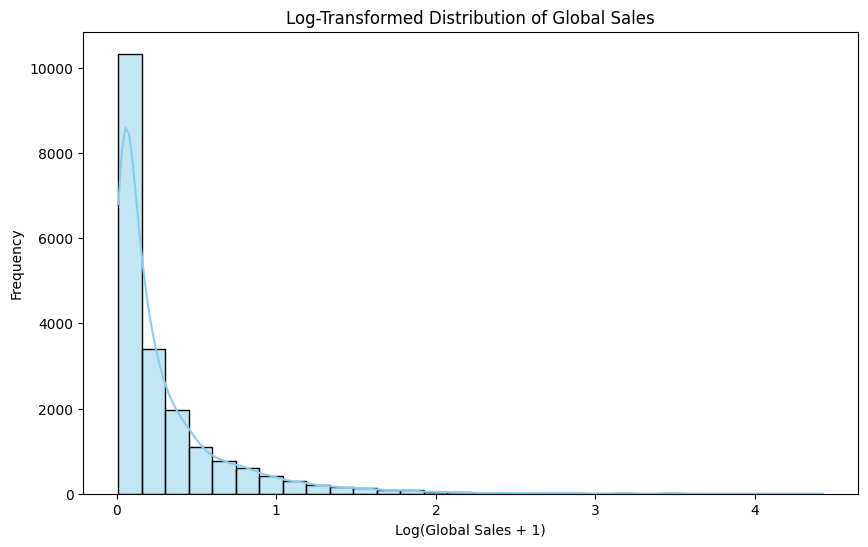

In [164]:
# Histogram of Log Sales
sales['Global_Sales_Log'] = np.log1p(sales['Global_Sales'])

# Plot the log-transformed data using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(sales['Global_Sales_Log'], bins=30, kde=True, color='skyblue')
plt.title('Log-Transformed Distribution of Global Sales')
plt.xlabel('Log(Global Sales + 1)')
plt.ylabel('Frequency')
plt.show()

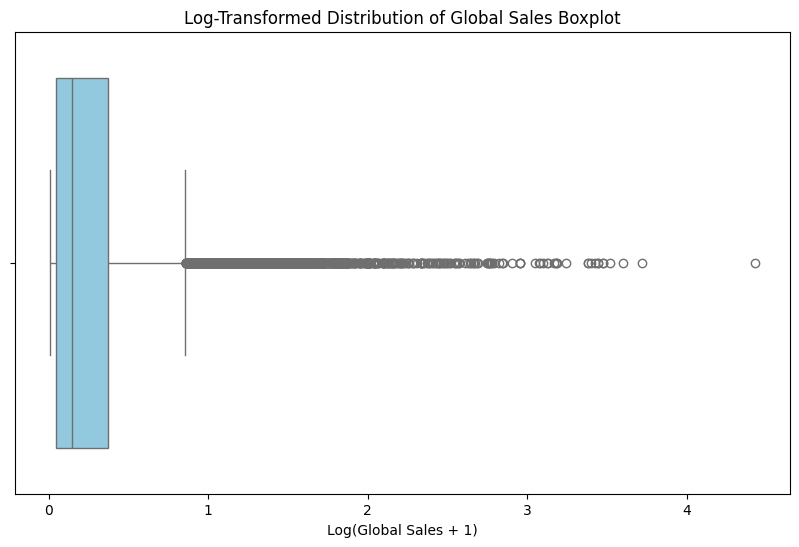

In [160]:
# Boxplot of LOG sales

sales['Global_Sales_Log'] = np.log1p(sales['Global_Sales'])
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales['Global_Sales_Log'], color='skyblue')
plt.title('Log-Transformed Distribution of Global Sales Boxplot')
plt.xlabel('Log(Global Sales + 1)')
plt.show()

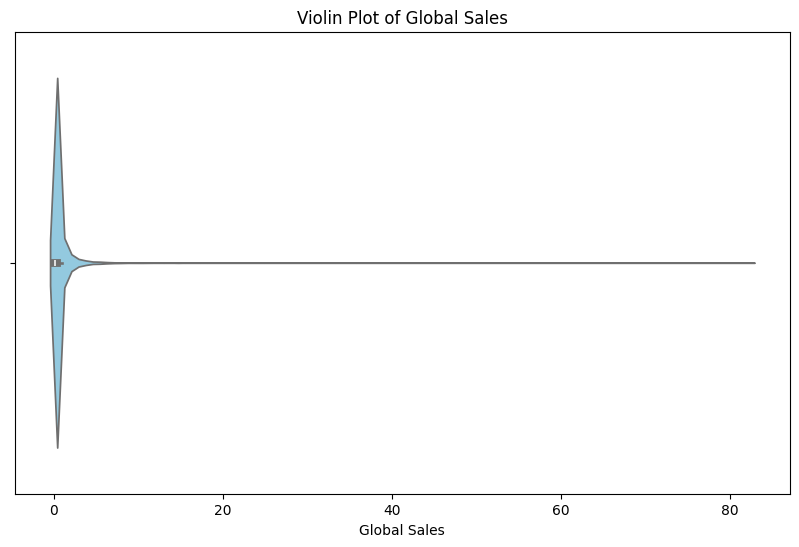

In [163]:
# Violin Plot of Sales
plt.figure(figsize=(10, 6))
sns.violinplot(x=sales['Global_Sales'], color='skyblue')
plt.title('Violin Plot of Global Sales')
plt.xlabel('Global Sales')
plt.show()

In [ ]:
def square(n):
    '''Takes in a number n, returns the square of n'''
    return n**2

In [24]:
tags = pd.read_csv('data/tags.csv')

In [49]:
all_games['all_sentiment'].value_counts()

all_sentiment
Very Positive              202
Mixed                      109
Mostly Positive             91
Overwhelmingly Positive     36
Positive                    15
Mostly Negative              7
Negative                     2
Very Negative                1
Overwhelmingly Negative      1
Name: count, dtype: int64

In [50]:
order = ['Overwhelmingly Negative', 'Mostly Negative', 'Very Negative', 'Negative', 'Mixed', 'Positive', 'Very Positive', 'Mostly Positive', 'Overwhelmingly Positive' ]

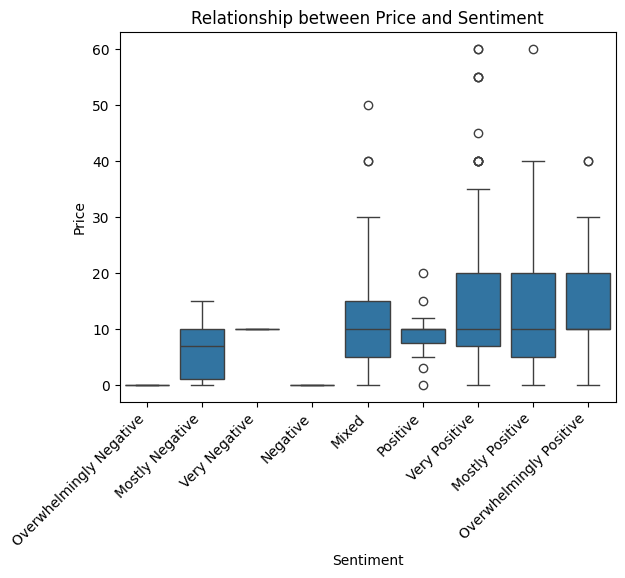

In [53]:
# plt.figure(figsize=(10, 6))
sns.boxplot(x='all_sentiment', y='price', data=all_games, order=order)
plt.title('Relationship between Price and Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right') 
plt.show()

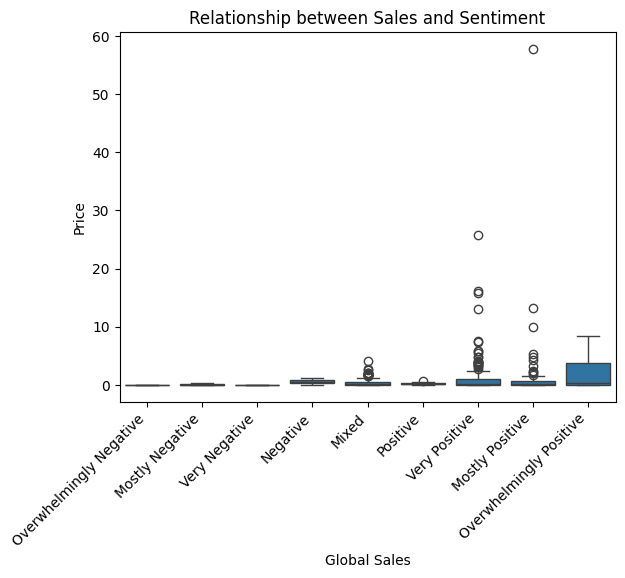

In [55]:
sns.boxplot(x='all_sentiment', y='global_sales', data=all_games, order=order)
plt.title('Relationship between Sales and Sentiment')
plt.xlabel('Global Sales')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [8]:
all_games.columns

Index(['appid', 'name', 'estimated_owners', 'price', 'dlc_count', 'windows',
       'mac', 'linux', 'metacritic_score', 'user_score', 'achievements',
       'recommendations', 'average_playtime_forever',
       'average_playtime_two_weeks', 'median_playtime_forever',
       'median_playtime_two_weeks', 'developers', 'publishers', 'genres',
       'tags', 'single_player', 'release_year', 'players', 'price_rounded',
       'price_category', 'popular_tags', 'recent_sentiment',
       'recent_review_number', 'recent_positive_percentage', 'all_sentiment',
       'all_review_number', 'all_positive_percentage', 'global_sales'],
      dtype='object')

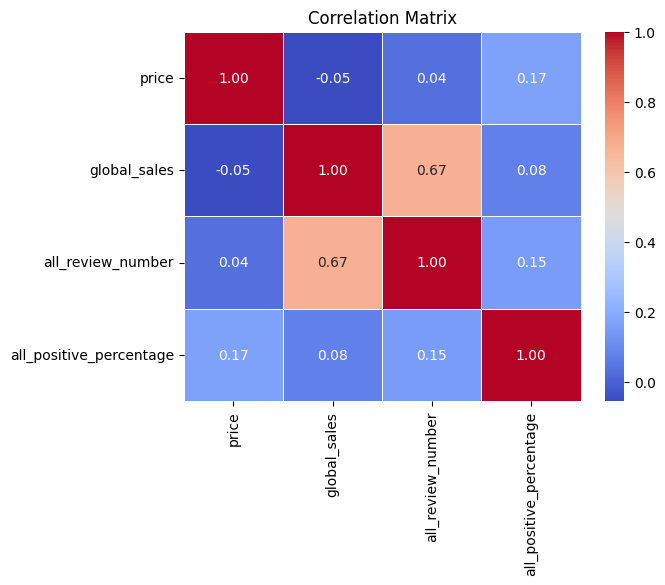

In [10]:
correlation_matrix = all_games.loc[:,['price', 'global_sales', 'all_review_number', 'all_positive_percentage']].corr()
# plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


<AxesSubplot: xlabel='mac', ylabel='count'>

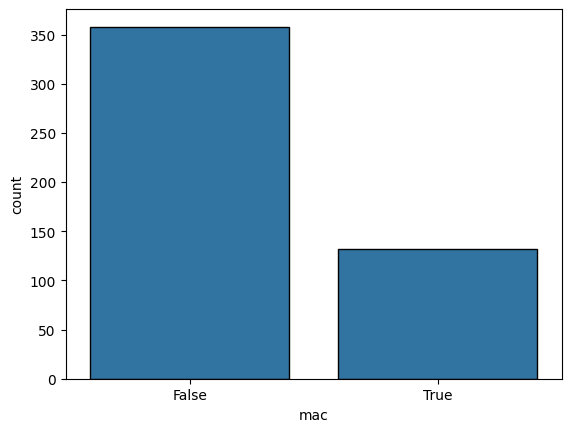

In [13]:
# sns.countplot(data=all_games, x='mac', edgecolor='k')


# sns.countplot(data=df, x='Variable1', palette='Set2', edgecolor='k', label='Variable1')
# sns.countplot(data=df, x='Variable2', palette='Set2', edgecolor='k', label='Variable2')
# sns.countplot(data=df, x='Variable3', palette='Set2', edgecolor='k', label='Variable3')


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


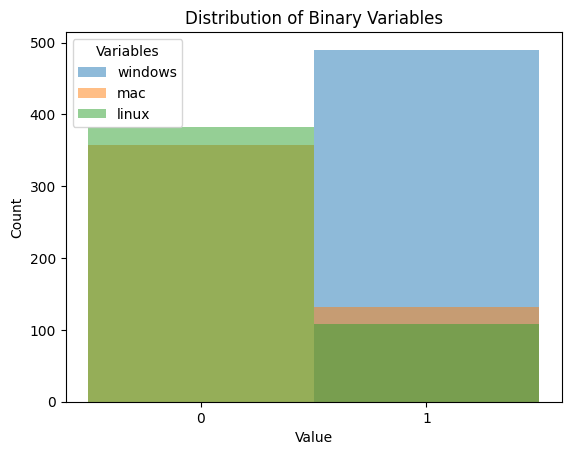

In [16]:
for column in all_games.loc[:, ['windows', 'mac', 'linux']]:
    plt.hist(all_games[column], bins=[-0.5, 0.5, 1.5], alpha=0.5, label=column)

plt.title('Distribution of Binary Variables')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.legend(title='Variables')
plt.show()

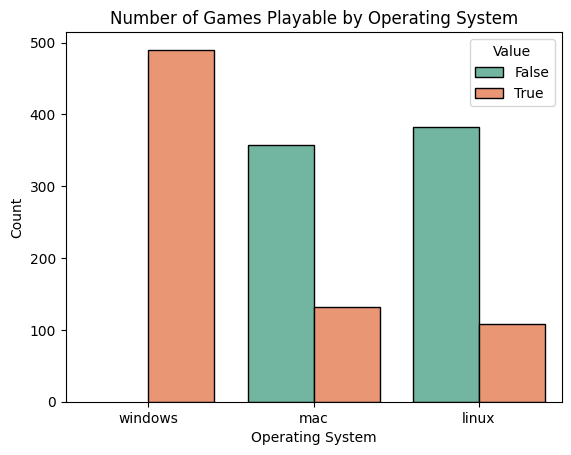

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame
# data = {
#     'Variable1': [1, 0, 1, 1, 0],
#     'Variable2': [0, 1, 0, 1, 1],
#     'Variable3': [1, 0, 1, 0, 1],
# }

# df = pd.DataFrame(data)

df = all_games.loc[:, ['windows', 'mac', 'linux']]

# Reshape the DataFrame for plotting
df_melted = pd.melt(df, value_vars=df.columns)





# Plot the bar plot with bars for both True and False values
# plt.figure(figsize=(12, 6))
sns.countplot(data=df_melted, x='variable', hue='value', palette='Set2', edgecolor='k')

plt.title('Number of Games Playable by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.legend(title='Value', labels=['False', 'True'])
plt.show()


/var/folders/xb/kh9kw84n5k57h6w4jp5kr23m0000gn/T/ipykernel_13431/3192617825.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f'{pair[0]}-{pair[1]}' for pair, count in result], y=[count for pair, count in result],


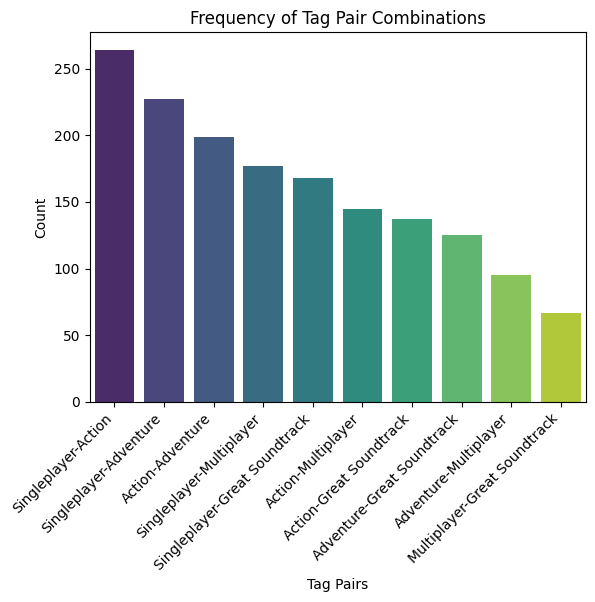

In [27]:
tags_related(5, True)

In [22]:
def tags_related_plot(result):
    """
    Visualize the frequency of tag pair combinations using a bar plot.

    Parameters
    ----------
    result : list of tuples
        A list where each tuple contains a tag pair and its corresponding cross-tabulation table values for ones.

    Returns
    -------
    None

    Notes
    -----
    This function is meant to be used in tandem with the tags_related(num, plot) function when plot is set
    to true and should not be called manually by the user. It takes in the result of tags_related(), which
    is a list of tuples, where each tuple contains a tag pair and the count of ones in the cross-tabulation.
    It visualizes the results using a bar plot with tag pairs on the x-axis and counts on the y-axis.

    Parameters:
    - result (list of tuples): A list where each tuple contains a tag pair and its corresponding count of ones.

    Examples
    --------
    To visualize the results for a given list of tag pairs and counts:
    >>> tags_related_plot(result)
    """
    sns.barplot(x=[f'{pair[0]}-{pair[1]}' for pair, count in result], y=[count for pair, count in result],
                palette='viridis')
    plt.xlabel('Tag Pairs')
    plt.ylabel('Count')
    plt.title('Frequency of Tag Pair Combinations')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    return


def tags_related(num=5, plot=False):
    """
    Analyze and visualize the frequency of tag pair combinations.

    Parameters
    ----------
    num : int, optional
        The number of tags to consider for analysis. Default is 5.
    plot : bool, optional
        If True, plot the results using `tags_related_plot`. Default is False.

    Returns
    -------
    list of tuples or None
        A sorted list where each tuple contains a tag pair and its corresponding cross-tabulation table values for ones.
        If `plot` is True, the function returns None.

    Notes
    -----
    This function analyzes the frequency of combinations of two tags in a DataFrame by calculating cross-tabulation tables.
    It returns a sorted list of tuples, where each tuple contains a tag pair and the count of ones in the cross-tabulation.
    If `plot` is True, the function also calls `tags_related_plot` to visualize the results using a bar plot.

    Parameters:
    - num (int, optional): The number of tags to consider for analysis. Default is 5.
    - plot (bool, optional): If True, plot the results. Default is False.

    Examples
    --------
    To analyze the relationships for the top 5 tags:
    >>> result = tags_related(5)
    >>> print(result)

    To analyze and plot the relationships for the top 10 tags:
    >>> tags_related(10, plot=True)
    """
    if (num < 2):
        return str(f"{num} is too small. Please input a number between 2 and 50.")
    if (num > 50):
        return str(f"{num} is too large. Please input a number between 2 and 50.")

    df = tags.iloc[:, 1:num + 1]
    tag_names = df.columns
    result = []

    for i in range(len(tag_names)):
        for j in range(i + 1, len(tag_names)):
            tag1, tag2 = tag_names[i], tag_names[j]
            cross_table_ones = pd.crosstab(tags[tag1], tags[tag2]).iloc[1, 1]
            result.append(((tag1, tag2), cross_table_ones))

    # Sort the result in descending order based on cross-tabulation values
    result = sorted(result, key=lambda x: x[1], reverse=True)

    if plot:
        tags_related_plot(result)
    else:
        return result



In [46]:
def graph_mean_tag_prices(which='common', num=10, drop_zeroes=True):
    num = num+1
    if which == 'common':
        top_tags = tags.iloc[:, 1:num].columns
    else:
        top_tags = tags.iloc[:, 1:].columns

    mean_prices_list = []
    for tag in top_tags:
        mean_price = summary_stats_by_tag(tag, drop_zeroes)['mean']
        mean_prices_list.append(mean_price)

    tags_data = {
        'tag': top_tags,
        'mean_price': mean_prices_list
    }

    tags_data = pd.DataFrame(tags_data)

    if which == 'most_exp':
        tags_data = tags_data.sort_values(by='mean_price', ascending=False)
    elif which == 'least_exp':
        tags_data = tags_data.sort_values(by='mean_price', ascending=True)
    tags_data = tags_data.iloc[0:num, :]

    plt.figure(figsize=(10, 6))
    plt.bar(tags_data['tag'], tags_data['mean_price'])
    plt.xlabel('Tags')
    plt.ylabel('Mean Price ($)')
    plt.title('Mean Price for Each Tag')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()
    
    plt.savefig('common_tags_price.png')
    
    return



def summary_stats_by_tag(chosen_tag, drop_zeroes=True):
    

    if not chosen_tag in tags.columns:
        return str(f"The tag {chosen_tag} was not found.")

    df = tags[tags[chosen_tag] == 1].iloc[:, 0]
    tag_df = all_games[all_games['name'].isin(df)]

    if drop_zeroes:
        tag_df = tag_df[tag_df['price'] != 0]

    summary_stats = {
        'min': tag_df['price'].min(),
        'mean': tag_df['price'].mean(),
        'max': tag_df['price'].max()

    }

    return summary_stats

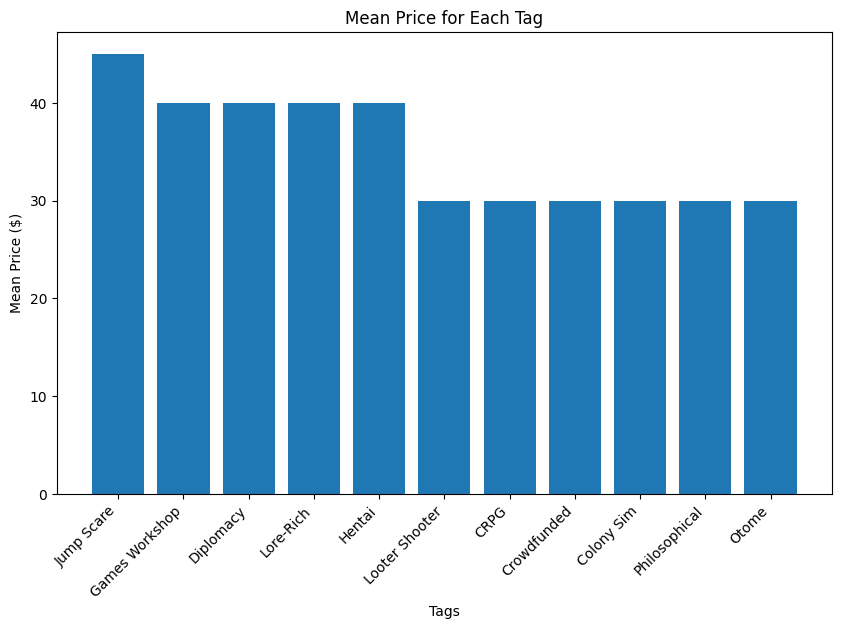

In [44]:
graph_mean_tag_prices(which='most_exp', num=10, drop_zeroes=True)

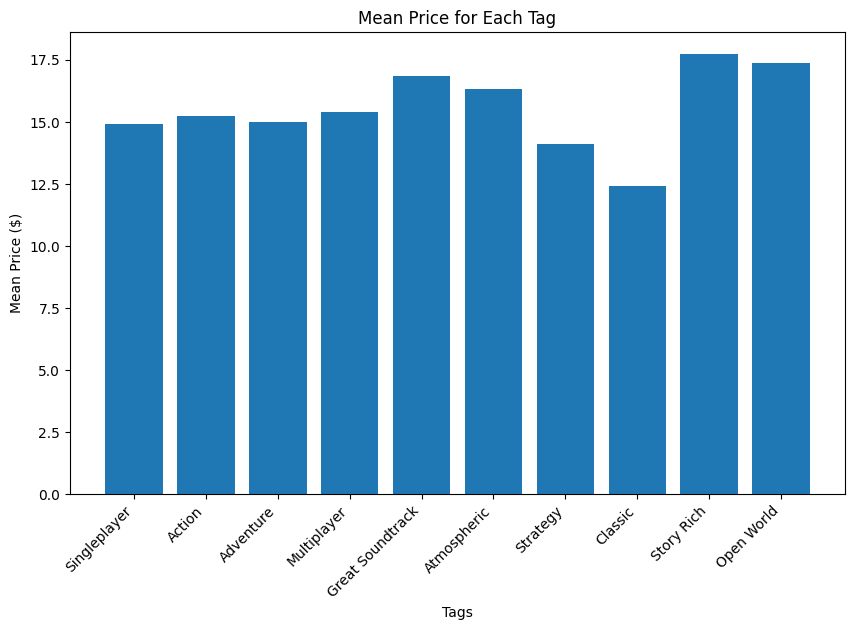

<Figure size 640x480 with 0 Axes>

In [47]:
graph_mean_tag_prices(which='common', num=10)
# plt.savefig('common_tags_price.png')

In [69]:
all_games['players'].value_counts()

players
single          288
single/multi    189
multi            10
Name: count, dtype: int64

In [68]:
all_games.columns

Index(['appid', 'name', 'estimated_owners', 'price', 'dlc_count', 'windows',
       'mac', 'linux', 'metacritic_score', 'user_score', 'achievements',
       'recommendations', 'average_playtime_forever',
       'average_playtime_two_weeks', 'median_playtime_forever',
       'median_playtime_two_weeks', 'developers', 'publishers', 'genres',
       'tags', 'single_player', 'release_year', 'players', 'price_rounded',
       'price_category', 'popular_tags', 'recent_sentiment',
       'recent_review_number', 'recent_positive_percentage', 'all_sentiment',
       'all_review_number', 'all_positive_percentage', 'global_sales'],
      dtype='object')

In [102]:
def recommend(num_games=5, price_min=0.00, price_max=60.00, tags_to_filter=[], 
              developers=[], publishers=[], players="single/multi", OS='windows', reviews='Mixed'):
    
    """
    Recommends a specified number of games based on user-defined metrics.

    Parameters:
    - num_games (int): Number of games to recommend.
    - price_min (float): Minimum price filter for games.
    - price_max (float): Maximum price filter for games.
    - tags_to_filter (list): List of tags to filter games by.
    - developers (list): List of developers to filter games by.
    - publishers (list): List of publishers to filter games by.
    - players (str): Type of players ('single', 'multi', or 'single/multi').
    - OS (str): Operating system filter ('windows', 'mac', or 'linux').
    - reviews (str): Sentiment level to filter games by.

    Returns:
    - pandas.Series: Series containing the names of the recommended games.

    Example usage:
    >>> recommend(num_games=10, price_min=0, price_max=60, tags_to_filter=['Action', 'Adventure'])
    >>> recommend(num_games=10, developers=['Valve'])
    >>> recommend(num_games=5, publishers=['Valve'])
    >>> recommend(num_games=10, players="single", OS="mac")
    >>> recommend(num_games=10, reviews="Positive")
    >>> recommend(num_games=1, price_min=0, price_max=10)
    """
    
    # filter all_games by games that appear in the right range:
    df = all_games[(all_games['price'] >= price_min) & (all_games['price'] <= price_max)]
    
    # filter priced by games that have these tags
    if tags_to_filter: 
        tag_filter_condition = tags[tags_to_filter].eq(1).all(axis=1)
        df = df[df['name'].isin(tags[tag_filter_condition]['name'])]
    
    # filter by certain developer(s) if not empty
    if developers:
        df = df[df['developers'].isin(developers)]
    
    # filter by certain publisher(s) if not empty
    if publishers:
        df = df[df['publishers'].isin(publishers)]
    
    # filter to the number of players specified
    if players == "single":
        df = df[df['players'] == 'single']
    elif players == "multi":
        df = df[df['players'] == 'multi']
    # else do nothing
    
    # filter to a certain operating system
    if OS == "mac":
        df = df[df['mac'] == 1]
    elif OS == "linux":
        df = df[df['linux'] == 1]
    # else windows --> do nothing

    sentiment_mapping = {
    'Overwhelmingly Negative': ['Overwhelmingly Negative', 'Mostly Negative', 'Very Negative', 'Negative', 'Mixed', 'Positive', 'Very Positive', 'Mostly Positive', 'Overwhelmingly Positive'],
    'Mostly Negative': ['Mostly Negative', 'Very Negative', 'Negative', 'Mixed', 'Positive', 'Very Positive', 'Mostly Positive', 'Overwhelmingly Positive'],
    'Very Negative': ['Very Negative', 'Negative', 'Mixed', 'Positive', 'Very Positive', 'Mostly Positive', 'Overwhelmingly Positive'],
    'Negative': ['Negative', 'Mixed', 'Positive', 'Very Positive', 'Mostly Positive', 'Overwhelmingly Positive'],
    'Mixed': ['Mixed', 'Positive', 'Very Positive', 'Mostly Positive', 'Overwhelmingly Positive'],
    'Positive': ['Positive', 'Very Positive', 'Mostly Positive', 'Overwhelmingly Positive'],
    'Very Positive': ['Very Positive', 'Mostly Positive', 'Overwhelmingly Positive'],
    'Mostly Positive': ['Mostly Positive', 'Overwhelmingly Positive'],
    'Overwhelmingly Positive': ['Overwhelmingly Positive']
    }

#     selected_sentiment = 'Mixed'
    sentiment_values = sentiment_mapping.get(reviews, [])
    df = df[df['all_sentiment'].isin(sentiment_values)]
    
    
    
    # then do some sorting? sort by number of total reviews
    df = df.sort_values(by='all_review_number', ascending=False)
    df = df.drop_duplicates(subset='name')
    
    return df['name'].head(num_games)
    
    

    
# recommend(10, price_min=0, price_max=60, tags_to_filter=['Action', 'Adventure'])
# recommend(10, publishers=['Bethesda'])


# recommend(5, publishers=['Valve'])

# recommend(10, players="single", OS="mac")

# recommend(10, reviews = "Positive")


# recommend(1, price_min=0, price_max=10)
    
    
    
    
    
    
recommend(num_games=5,price_max=20, tags_to_filter=['Action'], reviews="Positive")

430    Grand Theft Auto V
353              Terraria
299         Left 4 Dead 2
204              Portal 2
262             Fallout 4
Name: name, dtype: object

In [78]:
all_games['developers'].value_counts()

developers
Valve                        10
Crystal Dynamics              6
SEGA                          6
Team17 Digital Ltd            6
Daedalic Entertainment        6
                             ..
2K Marin                      1
Tango Gameworks               1
Rockstar Studios              1
Team Bondi,Rockstar Leeds     1
Criterion Games               1
Name: count, Length: 328, dtype: int64

In [111]:

def graph(col1, col2, col_types='cont-cont'):
    """
    Generate and display plots for the relationship between two columns in a DataFrame.

    Parameters
    ----------
    col1 : str
        The name of the first column.
    col2 : str
        The name of the second column.
    col_types : {'cont-cont', 'cont-cat', 'cat-cat'}, optional
        The types of the columns for analysis:
        - 'cont-cont': Continuous vs. Continuous
        - 'cont-cat': Continuous vs. Categorical
        - 'cat-cat': Categorical vs. Categorical
        Default is 'cont-cont'.

    Returns
    -------
    str or None
        If the analysis is not possible due to insufficient data, a message is returned.
        Otherwise, None is returned.

    Examples
    --------
    >>> graph('price', 'global_sales', col_types='cont-cont')
    # (Plots based on the col_types)

    Notes
    -----
    - The function may return a message if the dataset has less than 15 values after dropping NA rows.
    """

    columns = [col1, col2]
    df = all_games.dropna(subset=columns)
    df = df.loc[:, columns]

    # if the length of the df is now less than 15, it might be wrong to analyse the relationship?
    if df.shape[0] < 15:
        return ("This relationship has less than 15 values to analyze")

    if (col_types == 'cont-cont'):
        plt.figure(figsize=(12, 8))
        sns.jointplot(x=col1, y=col2, data=df)
        plt.show()

        plt.figure(figsize=(12, 8))
        sns.pairplot(df)
        plt.show()

        plt.figure(figsize=(12, 8))
        sns.regplot(x=col1, y=col2, data=df)
        plt.show()


    elif (col_types == 'cont-cat'):
        plt.figure(figsize=(12, 8))
        sns.boxplot(x=col2, y=col1, data=df)
        plt.show()

        plt.figure(figsize=(12, 8))
        sns.barplot(x=col2, y=col1, data=df)
        plt.show()

        plt.figure(figsize=(12, 8))
        sns.countplot(x=col2, data=df)
        plt.show()

    elif (col_types == 'cat-cat'):
#         order = ['Overwhelmingly Negative', 'Mostly Negative', 'Very Negative', 'Negative', 'Mixed', 'Positive', 'Very Positive', 'Mostly Positive', 'Overwhelmingly Positive' ]
        order = ['Mixed', 'Positive', 'Very Positive', 'Mostly Positive', 'Overwhelmingly Positive' ]

        df = df[df['all_sentiment'].isin(['Mixed', 'Positive', 'Very Positive', 'Mostly Positive', 'Overwhelmingly Positive'])]
        
        plt.figure(figsize=(12, 8))
        sns.countplot(x=col1, hue=col2, data=df, order = order)
        plt.xticks(rotation=45, ha='right') 
        plt.show()

        pivot_table = df.pivot_table(index=col1, columns=col2, aggfunc='size', fill_value=0)
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot_table, annot=True, cmap='viridis')
        plt.show()

    else:
        return ("Please input a valid value for col_types, such as cont-cont, cont-cat, or cat-cat")
    return


def analyze(col1, col2, col_types='cont-cont', plot=False):

    if not all(col in all_games.columns for col in [col1, col2]):
        # if they don't have both column names
        return str(f"One or both column names have not been found, check them for typos: 1st: {col1}, 2nd: {col2}")

    # drop all rows with NA values in these two columns
    columns = [col1, col2]
    df = all_games.dropna(subset=columns)
    df = df.loc[:, columns]

    # if the length of the df is now less than 20, it might be wrong to analyse the relationship?
    if (df.shape[0] < 15):
        return ("This relationship has less than 15 values to analyze")

    if (col_types == 'cont-cont'):

        correlation_coef, p_value = pearsonr(df[col1], df[col2])
        print(f'The correlation coefficient is: {correlation_coef}')
        print(f'The P value for the hypothesis test is: {p_value}')

    elif (col_types == 'cont-cat'):
        descriptive_stats = df.groupby(col2)[col1].describe()
        print(descriptive_stats)

    elif (col_types == 'cat-cat'):
        cross_tab = pd.crosstab(df[col1], df[col2], margins=True)  # look at joint distribution table
        print(cross_tab)
    else:
        return ("Please input a valid value for col_types, such as cont-cont, cont-cat, or cat-cat")

    if (plot == True):
        graph(col1, col2, col_types)
    return str(f"successfully analyzed relationship - {col_types}")

players                  multi  single  single/multi  All
all_sentiment                                            
Mixed                        3      55            50  108
Mostly Negative              0       2             4    6
Mostly Positive              5      44            42   91
Negative                     0       2             0    2
Overwhelmingly Negative      0       0             1    1
Overwhelmingly Positive      2      21            13   36
Positive                     0      11             3   14
Very Negative                0       1             0    1
Very Positive                0     132            70  202
All                         10     268           183  461


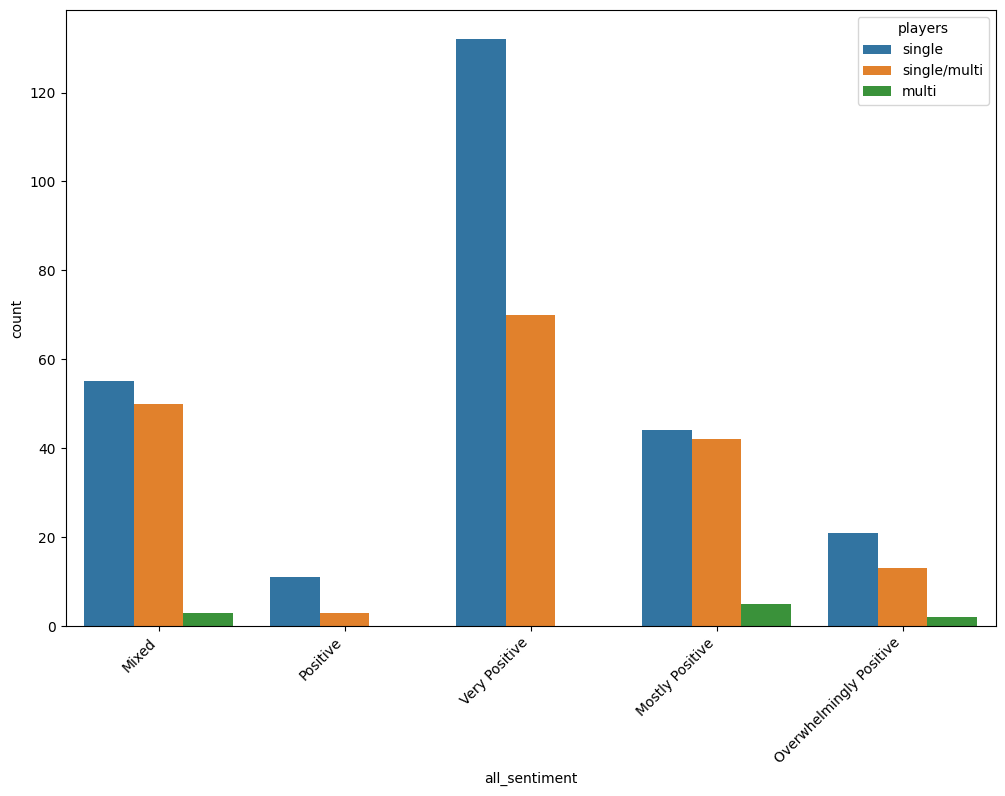

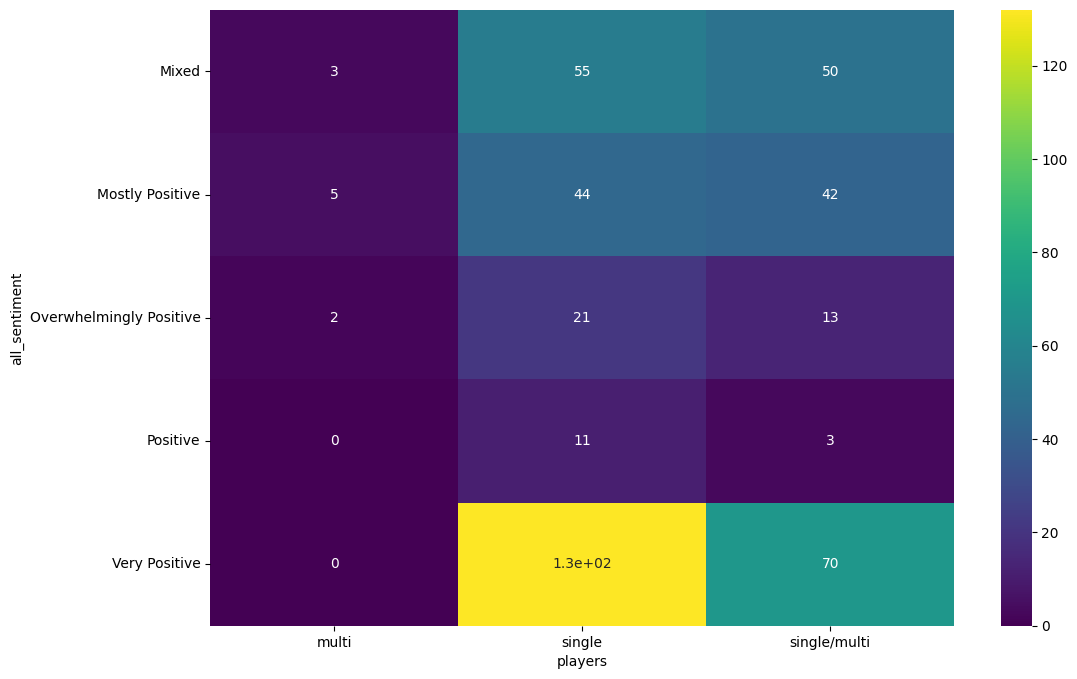

'successfully analyzed relationship - cat-cat'

In [112]:
analyze('all_sentiment', 'players', 'cat-cat', True)